# Step 1: Import libraries and load data

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("/content/archive.zip")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step2: Data Preprocessing

In [ ]:
import pandas as pd

data = {
    'Survived': [0, 1, 1, 1, 0],
    'Pclass': [3, 1, 3, 1, 3],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'SibSp': [1, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'Embarked': ['S', 'C', 'S', 'S', 'S']
}
df = pd.DataFrame(data)
df.loc[0, 'Age'] = None
df.loc[1, 'Embarked'] = None
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 2, 'C': 0, 'Q': 1})
print(df)


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  35.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         2
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


## Step 3:Exploratory Data Analysis: Correlation heatmap

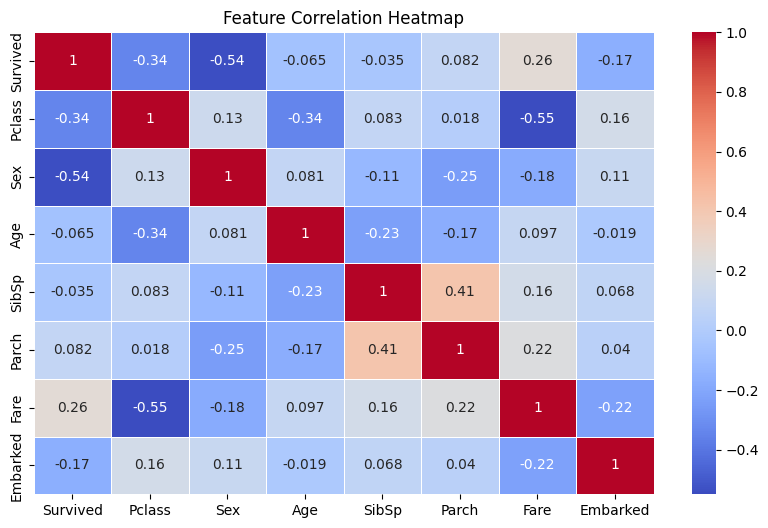

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 4: Split dataset into features and target, then train-test split

In [ ]:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("\nFirst 5 rows of X_train:")
print(X_train.head())



X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)

First 5 rows of X_train:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331       1    1  45.5      0      0  28.5000         2
733       2    1  23.0      0      0  13.0000         2
382       3    1  32.0      0      0   7.9250         2
704       3    1  26.0      1      0   7.8542         2
813       3    0   6.0      4      2  31.2750         2


# Step 5: Train Random Forest classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("Random Forest model trained successfully.")
train_accuracy = clf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")



Random Forest model trained successfully.
Training Accuracy: 0.9789


# Step 6: Predict on test set and evaluate

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



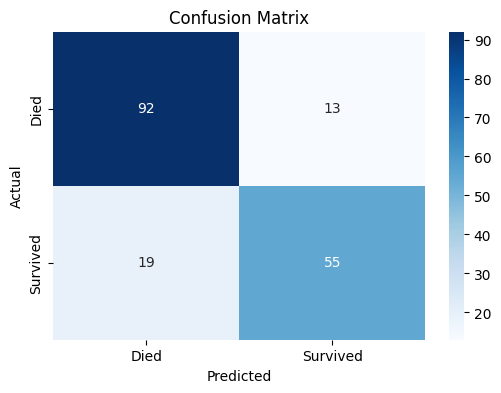

In [ ]:

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 7: Plot Feature Importances

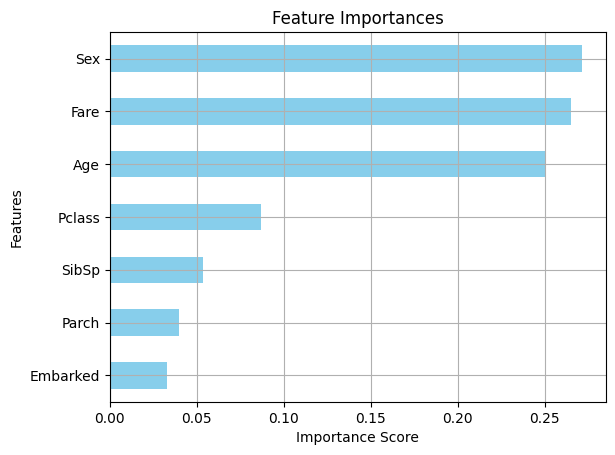

In [ ]:

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Step8:Visualizing Data

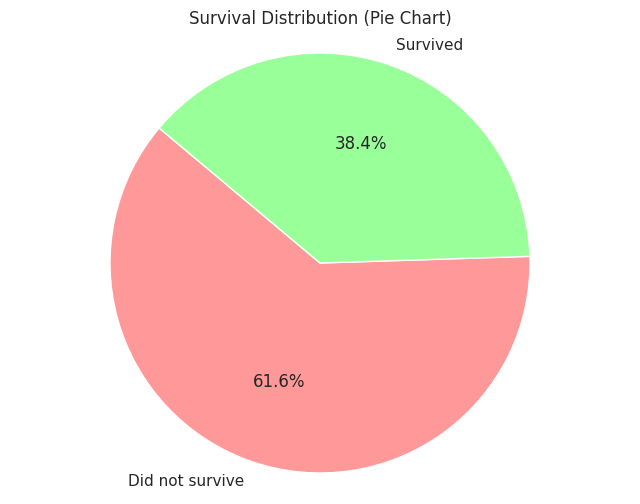

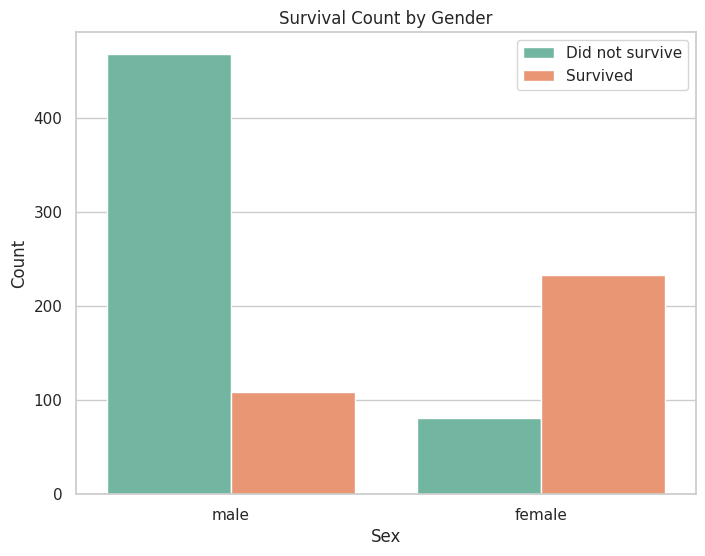

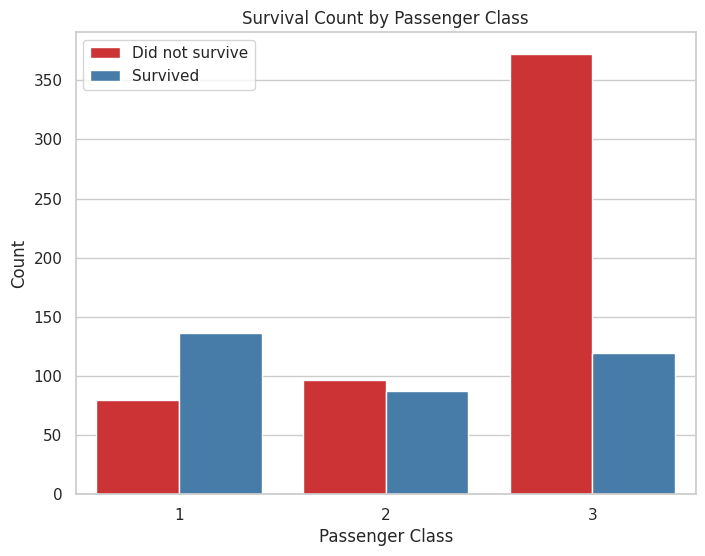

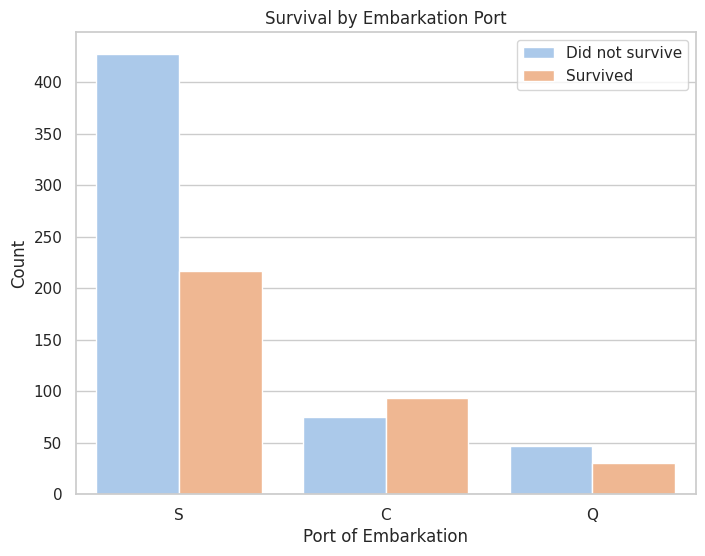

In [ ]:

df = pd.read_csv("/content/archive.zip")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)


survived_counts = df['Survived'].value_counts()
labels = ['Did not survive', 'Survived']
colors = ['#FF9999', '#99FF99']

plt.figure()
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Survival Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()


plt.figure()
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()


plt.figure()
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()
